# Data Analysis
#### The following is the confusion matrix using: 
    - Training set: All hand-drawn training images + ground truths from problem images (0-350)
    - Test set: Ground truths from problem images (350-706) only
##### Class 23 "random alphabets" ground truths were ignored (assume perfect segmentation)

In [1]:
#Data Initialization
confusion_matrix_index = 1
from data_analysis_data import ground_truth_list_1 as ground_truth_list
from data_analysis_data import prediction_list_1 as prediction_list
#Add base data for confusion matrix
for i in range(64):
    ground_truth_list.append(i)
    prediction_list.append(i)

Using TensorFlow backend.


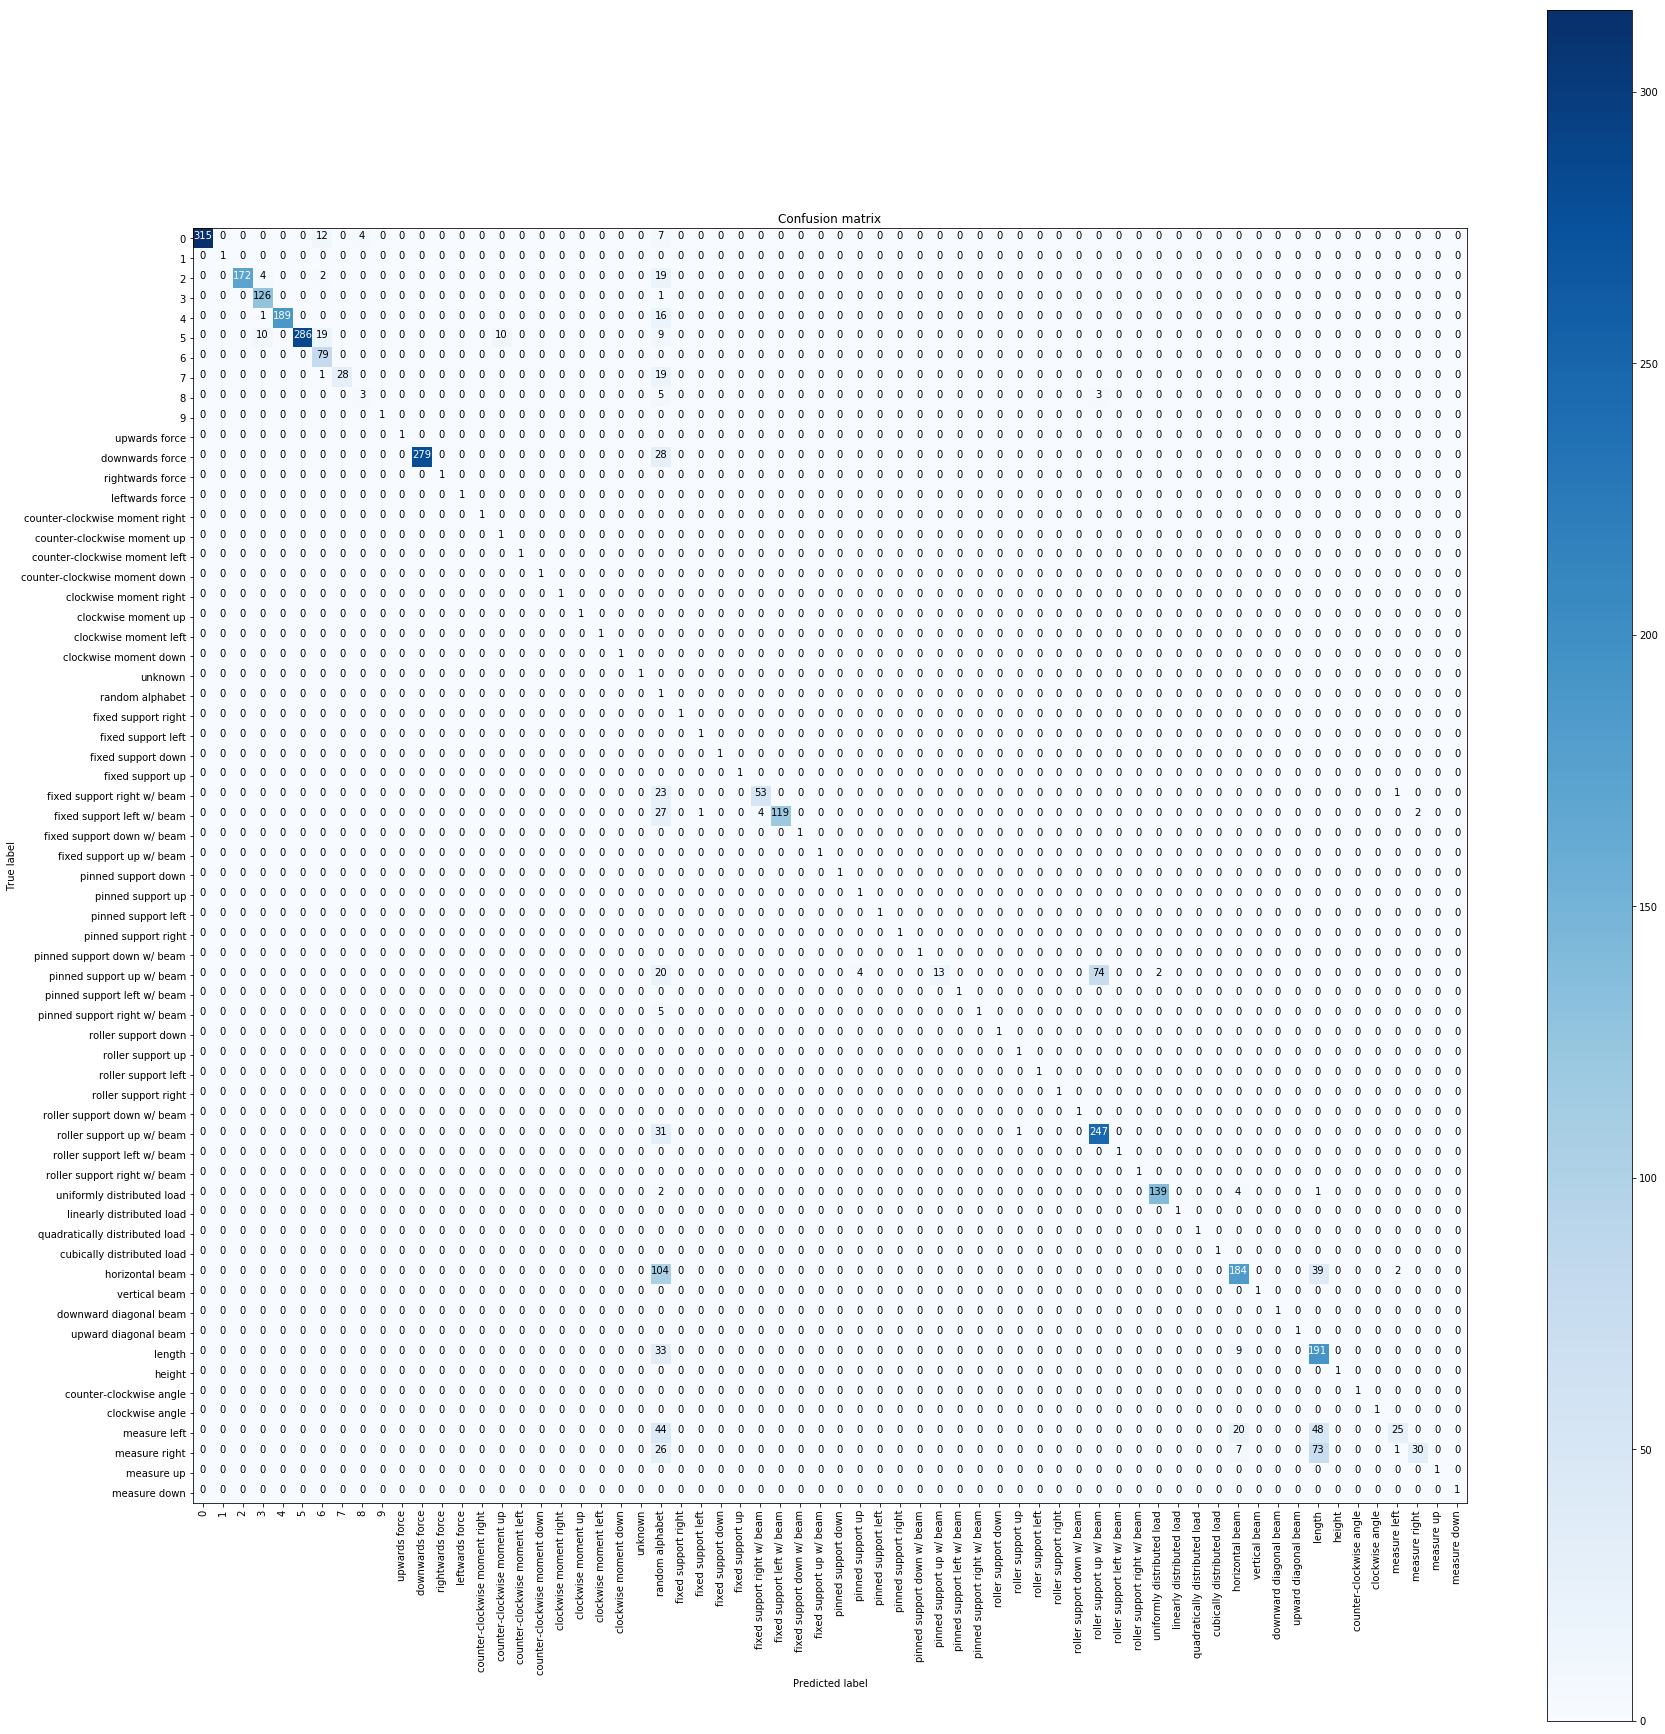

Figure is saved as: C:/Users/JustinSanJuan/Desktop/HKUST/UROP Deep Learning Image-based Structural Analysis/Code/Python/Testing Folder/confusion_matrix_1.png


In [2]:
dataset_PATH = "C:/Users/JustinSanJuan/Desktop/HKUST/UROP Deep Learning Image-based Structural Analysis/Code/Python/Testing Folder/"

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ground_truth_list,prediction_list)

# Plot non-normalized confusion matrix
from helper_functions import plot_confusion_matrix
from constants import target_names_all
import matplotlib.pyplot as plt
plot_confusion_matrix(cnf_matrix, classes=target_names_all,
                      normalize=False,
                      title='Confusion matrix', 
                      cmap=plt.cm.Blues,PATH=dataset_PATH, name="confusion_matrix_"+str(confusion_matrix_index), verbose = False)


In [3]:
from helper_functions import confusion_matrix_analysis
dataset_PATH = "C:/Users/JustinSanJuan/Desktop/HKUST/UROP Deep Learning Image-based Structural Analysis/Code/Python/Testing Folder/"
name = "confusion_matrix_"+str(confusion_matrix_index)+"_analysis"
min_count = 5
confusion_matrix_analysis(cnf_matrix, dataset_PATH, name, min_count, verbose = False) #Turn verbose on to show data analysis

Data saved as: C:/Users/JustinSanJuan/Desktop/HKUST/UROP Deep Learning Image-based Structural Analysis/Code/Python/Testing Folder/confusion_matrix_1_analysis.txt


### Confusion Matrix Results
#### Results are printed by code.<br>Summary is hand-organized.<br>Error counts less than 5 are ignored.
### Total testing data: [3238]<br>Current Accuracy (non-remapped): (74.0%)<br>Current Accuracy (remapped): (74.0%)


### Major issues are:
#### (12.8%) Several classes --> "random alphabet"<br> (4.9%) Several classes --> "length"<br><br> (2.3%) Pinned support up w/ beam --> "roller support up w/ beam<br> (1.1%) Measure left, length, measure right --> "horizontal beam"

Total: [416] (12.8%)<br>
[104] horizontal beam --> random alphabet<br>
[44] measure left --> random alphabet<br>
[33] length --> random alphabet<br>
[31] roller support up w/ beam --> random alphabet<br>
[28] downwards force --> random alphabet<br>
[27] fixed support left w/ beam --> random alphabet<br>
[26] measure right --> random alphabet<br>
[23] fixed support right w/ beam --> random alphabet<br>
[20] pinned support up w/ beam --> random alphabet<br>
[19] 2 --> random alphabet<br>
[19] 7 --> random alphabet<br>
[16] 4 --> random alphabet<br>
[9] 5 --> random alphabet<br>
[7] 0 --> random alphabet<br>
[5] 8 --> random alphabet<br>
[5] pinned support right w/ beam --> random alphabet

Total: [160] (4.9%)
[73] measure right --> length<br>
[48] measure left --> length<br>
[39] horizontal beam --> length<br>

##### Possible Accuracy (non-remapped): (91.8%)<br>Possible Accuracy (remapped): (91.8%)
Total: [74] (2.3%)
[74] pinned support up w/ beam --> roller support up w/ beam<br>

Total: [36] (1.1%)
[20] measure left --> horizontal beam<br>
[9] length --> horizontal beam<br>
[7] measure right --> horizontal beam<br>
##### Possible Accuracy (non-remapped): (95.2%)<br>Possible Accuracy (remapped): (95.2%)
##### The following are uncategorized errors:

Total [51] (1.6%)
[19] 5 --> 6<br>
[12] 0 --> 6<br>
[10] 5 --> 3<br>
[10] 5 --> counter-clockwise moment up<br>

#### The following are negligible due to remapping:
[0] None



## Action Plan
### Problem: (12.8%) Several classes --> "random alphabet"<br>Proposed Solution: Limit number of "random alphabet" training samples during training<br><br>Problem: (4.9%) Several classes --> "length"<br>Proposed Solution: More training samples<br><br>Problem: (2.3%) Pinned support up w/ beam --> "roller support up w/ beam<br>Proposed Solution: More training samples || Different initialization || Revise architecture<br><br> Problem: (1.1%) Measure left, length, measure right --> "horizontal beam"<br>Proposed Solution: More training samples